# **Protein structure visualization**

#### Protein Data Bank and PDB format

The Protein Data Bank (PDB) is a repository of 3D structures of biological macromolecules, including proteins, nucleic acids and complexes. The PDB provides a wealth of information on the structure, function, and interactions of biomolecules, making it a valuable resource for structural bioinformatics.

The PDB format is a text-based file format used for storing three-dimensional structures of biological macromolecules. It consists of a header section and of multiple atom records. The header section contains information about the experiment that was performed to determine the structure, as well as details about the authors and the molecule. The atom records contain data such as residue names, chain identifiers and atom coordinates (x, y, z).

The PDB format has become an essential tool for the analysis and visualization of protein structures, and it is widely used in the fields of structural biology, bioinformatics, and drug discovery. Various software packages and libraries have been developed to manipulate and visualize PDB files, making it possible to extract valuable information from these structures.

#### Exercise 4.1 - Load the structure of botulinum neurotoxin from the Protein Data Bank and visualize it

**Import the necessary modules**: We will need to import some classes from the Biopython's PDB module and the nglview library.

In [ ]:
import nglview as nv
from Bio.PDB import PDBParser

Look at the header of PDB file 3V0C. Can you identify the experimental technique that was used for structure determination?

In [ ]:
!head -30 3V0C.pdb

Look at the atom records of PDB file 3V0C. Can you identify the fourth residue of chain A?

In [ ]:
!grep '^ATOM' 3V0C.pdb | head -30

**Load the protein structure**: We will use a `PDBParser` object from the PDB module to load the protein structure from our PDB file.

In [ ]:
parser = PDBParser(QUIET = True)
structure = parser.get_structure("", "3V0C.pdb")

**Visualize the protein structure**: We will use the `show_biopython` method of nglview to load the biopython structure and the `add_cartoon` method to show the protein in the cartoon representation and colored in gray. Finally, we will center the view using the `center` method.

In [ ]:
view = nv.show_biopython(structure, default=False)
view.add_cartoon(selection="protein", color="gray")
view.center()
view

Try to get comfortable with the following commands:
- Translation: right click + drag
- Rotation: left click + drag
- Zoom: scroll wheel
- Center view: left click on the desired atom
- Selection: right click on the desired atom 

#### Exercise 4.2 - Color different regions of the structure and visualize zinc binding sites

Botulinum neurotoxin consists of two chains: the light chain and the heavy chain (see [UniProt: P0DPI1 - PTM/Processing](https://www.uniprot.org/uniprotkb/P0DPI1/entry#ptm_processing)) 

The light chain has the catalytic activity, responsible for the proteolytic cleavage of the target protein.

The heavy chain contains the translocation domain (TD), the belt region and the receptor binding domain (RBD), which is further divided into two regions: the N-terminus of the RBD (N-RBD) and the C-terminus of the RBD (C-RBD) (see [UniProt: P0DPI1 - Family & Domains](https://www.uniprot.org/uniprotkb/P0DPI1/entry#family_and_domains)).

The N-RBD and C-RBD are both involved in binding to the target receptor.

**Visualize different regions of the structure**: We will use the information provided on UniProt and reported in the table below to adjust the code and color the different regions of the structure with a specific color.

| Region | Start | End | Color |
|:-------|:------|:----|:------|
| Light chain | 2 | 448 | blue |
| Heavy chain | 449 | 1296 | / |
| Translocation domain (TD) | 449 | 870 | red |
| Belt | 492 | 545 | yellow |
| N-terminus of the receptor binding domain (N-RBD) | 871 | 1092 | green |
| C-terminus of the receptor binding domain (C-RBD) | 1093 | 1296 | orange |


In [ ]:
view = nv.show_biopython(structure, default=False)
view.add_cartoon(selection="protein", color="gray")
view.add_cartoon(selection="2-448", color="blue") # light chain
# add code to color the 4 remaining regions
view.center()
view

Can you identify the zinc atom with this representation?

**Visualize zinc binding sites**: We will now visualize the metal atom (zinc) in the spacefill representation and adjust the code below to visualize the binding site residues (223, 227 and 262) in the ball and stick representation.

In [ ]:
view.add_spacefill(selection="_Zn")
#residue 223 can be visualized in ball and stick representation using:
#view.add_ball_and_stick(selection="223")
#write a for loop to add ball and stick representation for residues 223, 227 and 262
view.center("223-227")

## **Copyright notice**

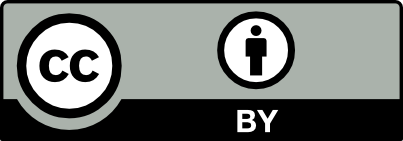

This work by NVO Bioinformatika is licensed under CC BY 4.0.

To view a copy of this license, visit:

http://creativecommons.org/licenses/by/4.0/.